<a href="https://colab.research.google.com/github/rohitkhadka1/AI-ML-DS/blob/main/Unconventional_Intro_to_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# The following code and descriptions belongs to and were written by Nikesh Subedi Dai, PhD candidate at University of Utah
```



# Unconventional Intro to Deep Learning

This notebook introduces the ubiquitous artificial neural networks in an unconventional manner. Compared to other traditional introductions, this would be more of a geometric/visualized approach to motivate how neural networks work and why they are so useful. We will also approach it with very elementary background.

The purpose of this is to provide a different perspective but not necessarily a simpler or a better (pedagocical) approach to learn about neural networks. There are many introduction to deep learning and neural networks that already exists which do a great job. Here are some links to those:

This is simply a different perspective.


## Intro

In [ ]:
!sudo apt update
!sudo apt install libcairo2-dev \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev dvisvgm
!pip install manim
!pip install IPython==8.21.0

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,840 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,461 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 810.0/810.0 kB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 89.4 MB/s eta 0:00:00
  Attempting uninstall: IPython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.21.0 which is incompatible.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from ipywidgets import interact, FloatSlider
from manim import *

## Binary Classification


We start with a simple problem of trying to classify something as YES/NO category. In practice, this would be like classifying whether an email is a spam, or whether there is a disease or not. Let's take an example.

There is a army recruitment program where recruits are first filtered by physical properties like height and weight. The Recruiters go case by case for each recruit to render a decision whether they pass or not. We assume that this decision is largely determined by the height and weight of the recruits. Let's figure out a way to learn an classifier that is able to take similar decision.


Here we first generate data for this classification. You can look at the code to see how it is generated but it is not necessary. In practice, we would not know how recruiters take their decisions. Do look at the graph it generates and think about whether you can confidently take similar decision to what the recruiters took.

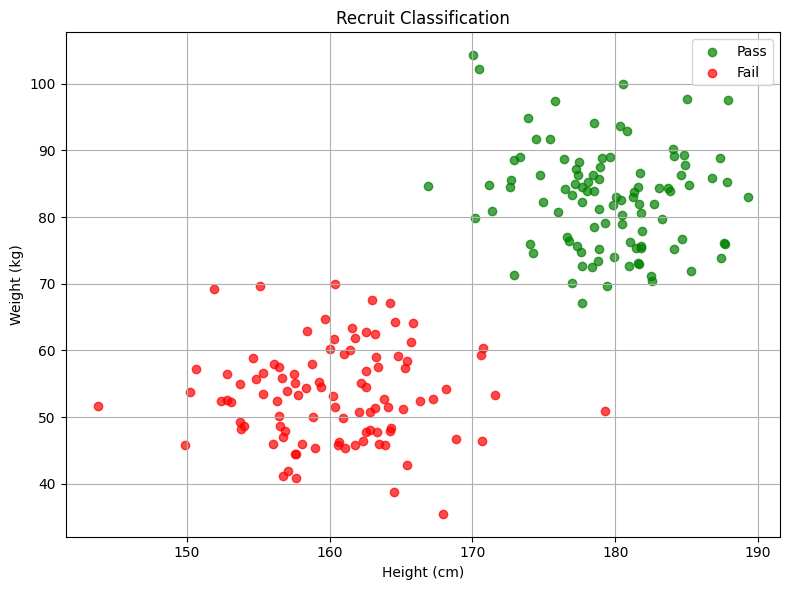

In [ ]:
### DATA GENERATION ONLY CHANGE SEPARABILITY
separability = 2  # Try 0.5 (hard to separate) to 3.0 (very distinct clusters)


# Set seed for reproducibility
np.random.seed(42)

# Parameters
num_samples = 200

# Base mean values
base_height = 170  # cm
base_weight = 67.5  # kg

# Generate two groups with separation
height_offset = 5 * separability
weight_offset = 7.5 * separability

# Pass group (label = 1)
heights_pass = np.random.normal(base_height + height_offset, 5, num_samples // 2)
weights_pass = np.random.normal(base_weight + weight_offset, 8, num_samples // 2)
labels_pass = np.ones(num_samples // 2)

# Fail group (label = 0)
heights_fail = np.random.normal(base_height - height_offset, 5, num_samples // 2)
weights_fail = np.random.normal(base_weight - weight_offset, 8, num_samples // 2)
labels_fail = np.zeros(num_samples // 2)

# Combine data
heights = np.concatenate([heights_pass, heights_fail])
weights = np.concatenate([weights_pass, weights_fail])
labels = np.concatenate([labels_pass, labels_fail])

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(heights[labels == 1], weights[labels == 1], color='green', label='Pass', alpha=0.7)
plt.scatter(heights[labels == 0], weights[labels == 0], color='red', label='Fail', alpha=0.7)
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title(f"Recruit Classification")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Are you confident that you can make similar decisions to what the recruiters made? Why or Why not?

We can clearly see that we can draw a line between the red and green points to separate them. No need to read the code here.

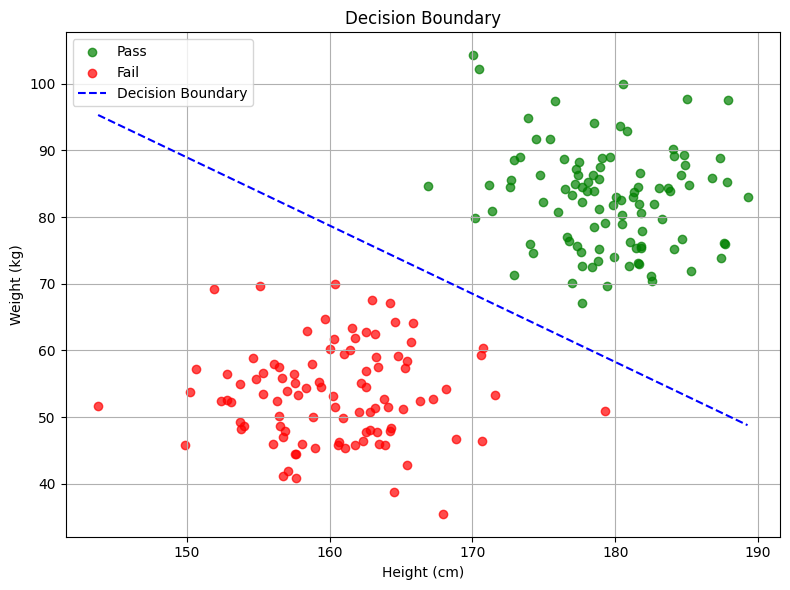

In [ ]:
# For this example, let's assume we already have heights, weights, labels from previous script
# Stack features into a matrix
X = np.column_stack((heights, weights))  # shape (N, 2)
y = labels  # shape (N,)

# Fit logistic regression
model = LogisticRegression()
model.fit(X, y)

# Extract weights and bias
w = model.coef_[0]
b = model.intercept_[0]

# Print model parameters
# print(f"Model weights: {w}")
# print(f"Model bias: {b}")

# Plot data
plt.figure(figsize=(8, 6))
plt.scatter(heights[y == 1], weights[y == 1], color='green', label='Pass', alpha=0.7)
plt.scatter(heights[y == 0], weights[y == 0], color='red', label='Fail', alpha=0.7)

# Plot decision boundary
x_vals = np.linspace(min(heights), max(heights), 100)
# Decision boundary: w1*x + w2*y + b = 0 -> y = -(w1*x + b)/w2
y_vals = -(w[0] * x_vals + b) / w[1]
plt.plot(x_vals, y_vals, 'b--', label='Decision Boundary')

# Labels and legend
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Decision Boundary")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Activity 1


Try finding the equation of a decision boundary below using the slider

In [ ]:

# ---- Interactive Plot Function ----
def plot_decision_boundary(A=0.0, B=0.0):
    plt.figure(figsize=(8, 6))

    # Scatter plot
    plt.scatter(heights[labels == 1], weights[labels == 1], color='green', label='Pass', alpha=0.7)
    plt.scatter(heights[labels == 0], weights[labels == 0], color='red', label='Fail', alpha=0.7)

    # Plot decision boundary line: y = A * x + B
    x_vals = np.linspace(min(heights), max(heights), 100)
    y_vals = A * x_vals + B
    plt.plot(x_vals, y_vals, 'b--', label=f'y = {A:.2f}x + {B:.2f}')

    # Labels and legend
    plt.xlabel("Height (cm)")
    plt.ylabel("Weight (kg)")
    plt.title("Interactive Decision Boundary (y = Ax + B)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ---- Interactive sliders ----
interact(
    plot_decision_boundary,
    A=FloatSlider(min=-1, max=1, step=0.005, value=0.0, description='Slope A'),
    B=FloatSlider(min=-200, max=200, step=1, value=100, description='Intercept B')
)

interactive(children=(FloatSlider(value=0.0, description='Slope A', max=1.0, min=-1.0, step=0.005), FloatSlide…

<function __main__.plot_decision_boundary(A=0.0, B=0.0)>

## Line Equation

Let's say we got $w=-0.52h+157$

$\implies 0.52h + w - 157 = 0$

Let $L(h,w) = 0.52h + w - 157$

So $L(h,w) = 0$ is the decision boundary. But what happens if we take h,w from our data.

Examples of PASS recruits (label = 1):
Height: 182.5 cm, Weight: 71.2 kg, L(x,y): 9.07
Height: 179.3 cm, Weight: 79.1 kg, L(x,y): 15.38
Height: 183.2 cm, Weight: 79.8 kg, L(x,y): 18.04
Height: 187.6 cm, Weight: 76.1 kg, L(x,y): 16.64
Height: 178.8 cm, Weight: 81.2 kg, L(x,y): 17.20

Examples of FAIL recruits (label = 0):
Height: 161.8 cm, Weight: 45.9 kg, L(x,y): -27.00
Height: 162.8 cm, Weight: 48.0 kg, L(x,y): -24.32
Height: 165.4 cm, Weight: 58.5 kg, L(x,y): -12.51
Height: 165.3 cm, Weight: 57.4 kg, L(x,y): -13.68
Height: 153.1 cm, Weight: 52.3 kg, L(x,y): -25.05


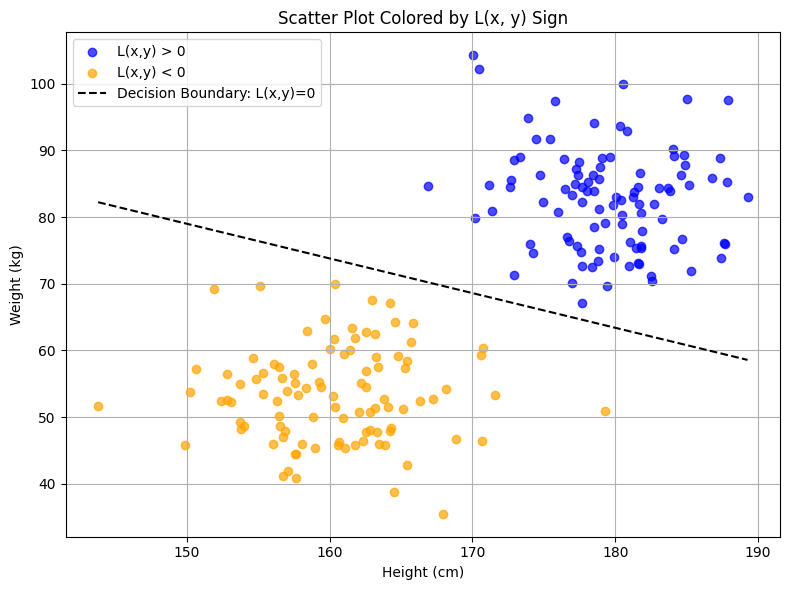

In [ ]:
L_vals = 0.52 * heights + weights - 157

# ---- Print examples ----
print("Examples of PASS recruits (label = 1):")
for i in np.where(labels == 1)[0][:5]:
    print(f"Height: {heights[i]:.1f} cm, Weight: {weights[i]:.1f} kg, L(x,y): {L_vals[i]:.2f}")

print("\nExamples of FAIL recruits (label = 0):")
for i in np.where(labels == 0)[0][:5]:
    print(f"Height: {heights[i]:.1f} cm, Weight: {weights[i]:.1f} kg, L(x,y): {L_vals[i]:.2f}")

# ---- Classify by sign of L(x, y) ----
is_positive = L_vals > 0
is_negative = L_vals < 0

# ---- Scatter plot of L(x,y) values ----
plt.figure(figsize=(8, 6))
plt.scatter(heights[is_positive], weights[is_positive], c='blue', label='L(x,y) > 0', alpha=0.7)
plt.scatter(heights[is_negative], weights[is_negative], c='orange', label='L(x,y) < 0', alpha=0.7)

# Plot decision boundary
x_vals = np.linspace(min(heights), max(heights), 100)
y_vals = -0.52 * x_vals + 157
plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary: L(x,y)=0')

plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Scatter Plot Colored by L(x, y) Sign")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Notice anything interesting?

In [ ]:
%%manim -qm ProjectToXAxisTogether

from manim import *
import numpy as np

class ProjectToXAxisTogether(Scene):
    def construct(self):
        # Title
        title = Text("Applying L(H, W) on Data", font_size=32).to_edge(UP)
        self.play(Write(title))

        # Input 2D plane
        input_axes = Axes(
            x_range=[150, 190, 10],
            y_range=[40, 90, 10],
            x_length=6,
            y_length=4,
            axis_config={"include_numbers": True},
        ).shift(LEFT * 3)

        # Updated labels: replace x with height and y with weight
        input_labels = input_axes.get_axis_labels(x_label="Height", y_label="Weight")
        self.play(Create(input_axes), Write(input_labels))

        # 1D output number line
        output_axis = NumberLine(
            x_range=[-50, 50, 10],
            length=6,
            include_numbers=True
        ).shift(RIGHT * 3)

        output_label = Text("L(Height, Weight)", font_size=24).next_to(output_axis, UP)
        self.play(Create(output_axis), Write(output_label))

        heights = np.concatenate([heights_pass, heights_fail])
        weights = np.concatenate([weights_pass, weights_fail])

        # L(x, y) = 0.52x + y - 157
        # Here x refers to height and y refers to weight in the context of the data generation
        def L(x, y): return 0.52 * x + y - 157

        dots = []
        move_animations = []

        for x, y in zip(heights, weights):
            input_point = input_axes.coords_to_point(x, y)
            output_val = L(x, y)
            output_point = output_axis.n2p(output_val)

            # Color based on sign
            color = RED if output_val > 0 else BLUE

            dot = Dot(input_point, color=color)
            dot.generate_target()
            dot.target.move_to(output_point)
            dots.append(dot)
            move_animations.append(MoveToTarget(dot))

        # Show dots on 2D plane
        self.play(*[FadeIn(dot) for dot in dots])
        self.wait(1)

        # Move all to x-axis together
        self.play(*move_animations, run_time=2)
        self.wait(2)


Manim Community v0.19.0

[07/19/25 07:38:21] INFO     Animation 0 : Partial movie file written in                   ]8;id=358767;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=716249;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/Pro                         
                             jectToXAxisTogether/2016333726_2212040961_223132457.mp4'                              

                    INFO     Writing 1 to media/Tex/6ecf9f51170c1a70.tex                    ]8;id=516217;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=929175;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py#111\111]8;;\

[07/19/25 07:38:22] INFO     Writing 5 to media/Tex/5683d89f396abe50.tex                    ]8;id=436983;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=542940;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py#111\111]8;;\

                    INFO     Writing 0 to media/Tex/66e1bc57a83e0f07.tex                    ]8;id=395368;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=67303;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py#111\111]8;;\

[07/19/25 07:38:23] INFO     Writing 6 to media/Tex/b330e3953bf029d7.tex                    ]8;id=254396;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=712018;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py#111\111]8;;\

                    INFO     Writing 7 to media/Tex/810c550cdbbf29da.tex                    ]8;id=801853;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=897626;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py#111\111]8;;\

[07/19/25 07:38:24] INFO     Writing 8 to media/Tex/b47c9feb1c667bc8.tex                    ]8;id=830207;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=52228;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py#111\111]8;;\

                    INFO     Writing 4 to media/Tex/31d3165490bf3404.tex                    ]8;id=876791;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=654087;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py#111\111]8;;\

[07/19/25 07:38:25] INFO     Writing Height to media/Tex/0df59fd444595999.tex               ]8;id=558850;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=287092;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py#111\111]8;;\

                    INFO     Writing Weight to media/Tex/2ca9e8f8fbc83749.tex               ]8;id=494818;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=589062;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py#111\111]8;;\

[07/19/25 07:38:27] INFO     Animation 1 : Partial movie file written in                   ]8;id=280506;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=535165;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/Pro                         
                             jectToXAxisTogether/543634251_1870337208_2002872169.mp4'                              

                    INFO     Writing - to media/Tex/ba96de15f98acfc8.tex                    ]8;id=695700;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=708578;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py#111\111]8;;\

                    INFO     Writing 3 to media/Tex/8de07035cb22c903.tex                    ]8;id=845536;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=17821;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py#111\111]8;;\

[07/19/25 07:38:28] INFO     Writing 2 to media/Tex/2b7ffb3c38a5a6e0.tex                    ]8;id=452264;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=162899;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py#111\111]8;;\

[07/19/25 07:38:30] INFO     Animation 2 : Partial movie file written in                   ]8;id=751748;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=610031;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/Pro                         
                             jectToXAxisTogether/543634251_426442666_3122738870.mp4'                               

[07/19/25 07:38:34] INFO     Animation 3 : Partial movie file written in                   ]8;id=845641;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=877335;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/Pro                         
                             jectToXAxisTogether/543634251_705130893_3429852223.mp4'                               

[07/19/25 07:38:35] INFO     Animation 4 : Partial movie file written in                   ]8;id=119751;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=794258;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/Pro                         
                             jectToXAxisTogether/543634251_4217992463_765777690.mp4'                               

[07/19/25 07:38:39] INFO     Animation 5 : Partial movie file written in                   ]8;id=691387;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=2820;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/Pro                         
                             jectToXAxisTogether/543634251_138320986_1175283366.mp4'                               

[07/19/25 07:38:41] INFO     Animation 6 : Partial movie file written in                   ]8;id=201841;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=363086;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/Pro                         
                             jectToXAxisTogether/543634251_2844360058_202160982.mp4'                               

                    INFO     Combining to Movie file.                                      ]8;id=869498;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=854291;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#739\739]8;;\

                    INFO                                                                   ]8;id=325970;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=716564;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#886\886]8;;\
                             File ready at                                                                         
                             '/content/media/videos/content/720p30/ProjectToXAxisTogether.                         
                             mp4'                                                                                  
                                                                                                                   

                    INFO     Rendered ProjectToXAxisTogether                                           ]8;id=729216;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=248959;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene.py#255\255]8;;\
                             Played 7 animations                                                                   

## Affine transform

What is happening above is also known as a affine transform.

The function $L(h,w) = 0.52h + w - 157$ can be represented in vector/matrix form.  


$$
L(h, w) =
\begin{bmatrix}
0.52 & 1
\end{bmatrix}
\begin{bmatrix}
h \\
w
\end{bmatrix}
- 157
$$

Remember that this is a line equation? So a line equation is actually a affine transform that transforms a point to 0 if the point lies on the line, >0 if point lies to the right of the line and \<0 if the point lies to the left of the line.

We can actually write this same transformation in the **2D plane** by forcing the **y-axis component** of the transformed points to become 0.

This can be done by replacing the $1 \times 2$ matrix with a $2 \times 2$ matrix:

This transforms any 2D point $(h, w)$ as follows:

$$
\begin{bmatrix}
x \\
y
\end{bmatrix}
=
\begin{bmatrix}
0.52 & 1.0 \\
0.0 & 0.0
\end{bmatrix}
\begin{bmatrix}
h \\
w
\end{bmatrix}
+
\begin{bmatrix}
-157.0 \\
0.0
\end{bmatrix}
=
\begin{bmatrix}
0.52h + w - 157 \\
0
\end{bmatrix}
$$

So the entire set of transformed points lies on the **x-axis**, with the value $L(h, w)$ as the x-coordinate. This is useful when projecting data onto a 1D subspace embedded in 2D.

Doing this allows us to visualize the same computation in the same 2D plane


In [ ]:
%%manim -qm ProjectToXAxisInPlace

from manim import *
import numpy as np

class ProjectToXAxisInPlace(Scene):
    def construct(self):

        ## DO NOT CHANGE ANYTHING
        M = np.array([
            [0.52, 1.0],
            [0.0,  0.0]
        ])
        B = np.array([-157.0, 0.0])

        # Title
        title = Text("Matrix Transformation in the Same Plane", font_size=32).to_edge(UP)
        self.play(Write(title))

        # Create a single 2D plane
        axes = Axes(
            x_range=[-60, 200, 20],
            y_range=[-10, 100, 10],
            x_length=10,
            y_length=5.5,
            axis_config={"include_numbers": True},
        )
        labels = axes.get_axis_labels(x_label="Height / L(H, W)", y_label="Weight")
        # Lower the 'Weight' label slightly
        labels[1].shift(DOWN * 0.5)
        # The axes_group is now centered, preventing overlap with the title
        axes_group = VGroup(axes, labels)
        self.play(Create(axes_group))

        heights = np.concatenate([heights_pass, heights_fail])
        weights = np.concatenate([weights_pass, weights_fail])

        # Store input vectors and create dots
        input_vectors = [np.array([h, w]) for h, w in zip(heights, weights)]

        dots = []
        num_pass = len(heights_pass)
        for i, vec in enumerate(input_vectors):
            color = RED if i < num_pass else BLUE  # First `num_pass` are passing class
            dot = Dot(axes.coords_to_point(vec[0], vec[1]), color=color)
            dots.append(dot)
        dots_group = VGroup(*dots)

        # Show the initial dots on the 2D plane
        self.play(FadeIn(dots_group))
        self.wait(1)

        # Add a label for the current calculation, positioned under the axes
        calc_label = MathTex("Calculating: 0.52H + W", font_size=36).next_to(axes_group, DOWN, buff=0.3)
        self.play(Write(calc_label))
        self.wait(0.5)

        # --- First Animation Step: Apply the Linear Transformation ---
        linear_transform_animations = []
        intermediate_vectors = []
        for i, dot in enumerate(dots):
            input_vec = input_vectors[i]
            intermediate_vec = M @ input_vec
            intermediate_vectors.append(intermediate_vec)

            target_point = axes.coords_to_point(intermediate_vec[0], intermediate_vec[1])
            dot.generate_target()
            dot.target.move_to(target_point)
            linear_transform_animations.append(MoveToTarget(dot))

        # Animate all dots moving to their intermediate positions
        self.play(AnimationGroup(*linear_transform_animations, lag_ratio=0), run_time=2)
        self.wait(1)

        # --- Second Animation Step: Apply the Bias and Update Label ---
        final_calc_label = MathTex("Calculating: 0.52H + W - 157", font_size=36).move_to(calc_label)

        bias_addition_animations = []
        for i, dot in enumerate(dots):
            intermediate_vec = intermediate_vectors[i]
            output_vec = intermediate_vec + B

            # Calculate the target point on the CURRENT axes
            target_point = axes.coords_to_point(output_vec[0], output_vec[1])
            dot.generate_target()
            dot.target.move_to(target_point)
            bias_addition_animations.append(MoveToTarget(dot))

        # Animate the bias addition and label change together
        self.play(
            AnimationGroup(*bias_addition_animations, lag_ratio=0),
            Transform(calc_label, final_calc_label),
            run_time=2
        )
        self.wait(1)

        # --- Third Animation Step: Change Axes for a "Zoomed" View ---
        new_axes = Axes(
            x_range=[-50, 50, 10],
            y_range=[-0.5, 0.5, 0.5],
            x_length=10,
            y_length=3,
            axis_config={"include_numbers": True},
        )
        new_labels = new_axes.get_axis_labels(x_label="L(H, W)", y_label="")
        # Reverted the manual adjustment of the x-label's position
        new_axes_group = VGroup(new_axes, new_labels).move_to(axes_group)

        # Create animations to move dots to their correct positions on the new axes
        dot_zoom_animations = []
        for i, dot in enumerate(dots):
            output_vec = intermediate_vectors[i] + B
            target_point = new_axes.coords_to_point(output_vec[0], output_vec[1])
            dot.generate_target()
            dot.target.move_to(target_point)
            dot_zoom_animations.append(MoveToTarget(dot))

        # Animate the axis change and the final dot repositioning together
        self.play(
            Transform(axes_group, new_axes_group),
            AnimationGroup(*dot_zoom_animations, lag_ratio=0),
            run_time=2
        )
        self.wait(2)


Manim Community v0.19.0

[07/19/25 07:39:24] INFO     Animation 0 : Partial movie file written in                   ]8;id=964585;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=269618;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/Pro                         
                             jectToXAxisInPlace/2016333726_3978016563_223132457.mp4'                               

                    INFO     Writing 9 to media/Tex/d994363fa45e89a1.tex                    ]8;id=132565;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=288261;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py#111\111]8;;\

[07/19/25 07:39:25] INFO     Writing Height / L(H, W) to media/Tex/42d30170b9f8a9d1.tex     ]8;id=369052;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=210611;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py#111\111]8;;\

[07/19/25 07:39:27] INFO     Animation 1 : Partial movie file written in                   ]8;id=618798;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=784785;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/Pro                         
                             jectToXAxisInPlace/543634251_3792863686_4282679415.mp4'                               

[07/19/25 07:39:29] INFO     Animation 2 : Partial movie file written in                   ]8;id=832814;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=368835;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/Pro                         
                             jectToXAxisInPlace/543634251_2754580369_3648055785.mp4'                               

[07/19/25 07:39:31] INFO     Animation 3 : Partial movie file written in                   ]8;id=405969;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=558360;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/Pro                         
                             jectToXAxisInPlace/543634251_4217992463_2333878642.mp4'                               

                    INFO     Writing Calculating: 0.52H + W to                              ]8;id=968134;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=781685;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py#111\111]8;;\
                             media/Tex/fe4a5b49a85216b0.tex                                                        

[07/19/25 07:39:33] INFO     Animation 4 : Partial movie file written in                   ]8;id=646731;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=346153;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/Pro                         
                             jectToXAxisInPlace/543634251_2956115897_2094949167.mp4'                               

[07/19/25 07:39:34] INFO     Animation 5 : Partial movie file written in                   ]8;id=2997;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=986096;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/Pro                         
                             jectToXAxisInPlace/543634251_2574473371_526566741.mp4'                                

[07/19/25 07:39:38] INFO     Animation 6 : Partial movie file written in                   ]8;id=755358;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=992911;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/Pro                         
                             jectToXAxisInPlace/543634251_834208461_3152576709.mp4'                                

[07/19/25 07:39:40] INFO     Animation 7 : Partial movie file written in                   ]8;id=363095;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=383889;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/Pro                         
                             jectToXAxisInPlace/543634251_4217992463_3986427965.mp4'                               

                    INFO     Writing Calculating: 0.52H + W - 157 to                        ]8;id=497401;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=835534;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py#111\111]8;;\
                             media/Tex/6f3d5261f1cae881.tex                                                        

[07/19/25 07:39:45] INFO     Animation 8 : Partial movie file written in                   ]8;id=447011;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=853613;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/Pro                         
                             jectToXAxisInPlace/543634251_1560799769_4172471285.mp4'                               

[07/19/25 07:39:47] INFO     Animation 9 : Partial movie file written in                   ]8;id=623616;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=279150;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/Pro                         
                             jectToXAxisInPlace/543634251_4217992463_2916152046.mp4'                               

                    INFO     Writing . to media/Tex/ec2b01090b1fbb55.tex                    ]8;id=846121;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=929036;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py#111\111]8;;\

                    INFO     Writing L(H, W) to media/Tex/5a581df55e1cdcbc.tex              ]8;id=848502;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=995373;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py#111\111]8;;\

[07/19/25 07:39:48] INFO     Writing \quad to media/Tex/d706ba1c11284492.tex                ]8;id=357323;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=289608;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py#111\111]8;;\

[07/19/25 07:39:56] INFO     Animation 10 : Partial movie file written in                  ]8;id=838293;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=233498;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/Pro                         
                             jectToXAxisInPlace/543634251_2872380272_1030277610.mp4'                               

[07/19/25 07:39:58] INFO     Animation 11 : Partial movie file written in                  ]8;id=117983;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=235721;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/Pro                         
                             jectToXAxisInPlace/543634251_2844360058_2411070897.mp4'                               

                    INFO     Combining to Movie file.                                      ]8;id=466920;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=99669;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#739\739]8;;\

                    INFO                                                                   ]8;id=499240;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=475553;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#886\886]8;;\
                             File ready at                                                                         
                             '/content/media/videos/content/720p30/ProjectToXAxisInPlace.m                         
                             p4'                                                                                   
                                                                                                                   

                    INFO     Rendered ProjectToXAxisInPlace                                            ]8;id=70845;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=167567;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene.py#255\255]8;;\
                             Played 12 animations                                                                  

## Activity 2

In [ ]:
%%manim -qm PlaygroundPointsTransfrom

from manim import *
import numpy as np

class PlaygroundPointsTransfrom(Scene):
    def construct(self):

        ## Play around with this
        M = np.array([[0.2, -0.27],
                      [0, -0.75]])
        B = np.array([1, 0])

        # DO NOT CHANGE ANYTHING BELOW

        # Title
        title = Text("Matrix Transformation in the Same Plane", font_size=32).to_edge(UP)
        self.play(Write(title))

        # Create a single 2D plane
        axes = Axes(
            x_range=[-60, 200, 20],
            y_range=[-10, 100, 10],
            x_length=10,
            y_length=5.5,
            axis_config={"include_numbers": True},
        )
        labels = axes.get_axis_labels(x_label="Height / L(H, W)", y_label="Weight")
        # Lower the 'Weight' label slightly
        labels[1].shift(DOWN * 0.5)
        # The axes_group is now centered, preventing overlap with the title
        axes_group = VGroup(axes, labels)
        self.play(Create(axes_group))

        heights = np.concatenate([heights_pass, heights_fail])
        weights = np.concatenate([weights_pass, weights_fail])

        # Store input vectors and create dots
        input_vectors = [np.array([h, w]) for h, w in zip(heights, weights)]

        dots = []
        # The color of each dot is determined by whether it's in the 'pass' or 'fail' group
        for i, vec in enumerate(input_vectors):
            # The first half of the data is 'pass' (RED), the second half is 'fail' (BLUE)
            color = RED if i < (num_samples // 2) else BLUE
            dot = Dot(axes.coords_to_point(vec[0], vec[1]), color=color)
            dots.append(dot)
        dots_group = VGroup(*dots)

        # Show the initial dots on the 2D plane
        self.play(FadeIn(dots_group))
        self.wait(1)

        # ---- Apply the affine transform ----
        # This section calculates the new position for each dot and animates the transformation.

        # Create a target VGroup to which the original group will transform.
        # This target group will hold the final positions of all the dots.
        target_dots_group = dots_group.copy()

        # Reposition each dot in the target group to its final transformed location.
        # This happens instantly and off-screen.
        for dot, vec in zip(target_dots_group, input_vectors):
            # Apply the affine transformation: output = M * input + B
            output_vec = M @ vec + B

            # Convert the new mathematical coordinates to screen coordinates.
            new_point = axes.coords_to_point(output_vec[0], output_vec[1])

            # Move the dot in the target group to the new point.
            dot.move_to(new_point)

        # Use Transform to animate the original dots_group into the shape and position
        # of the target_dots_group. This moves all points simultaneously as a single object.
        self.play(Transform(dots_group, target_dots_group))

        # Add a final pause to view the result of the transformation.
        self.wait(2)


Manim Community v0.19.0

[07/11/25 19:11:13] INFO     Animation 0 : Using cached data (hash :                           ]8;id=704953;file:///usr/local/lib/python3.11/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=652342;file:///usr/local/lib/python3.11/dist-packages/manim/renderer/cairo_renderer.py#89\89]8;;\
                             2016333726_3978016563_223132457)                                                      

[07/11/25 19:11:15] INFO     Animation 1 : Partial movie file written in                   ]8;id=955875;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=173980;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/Pla                         
                             ygroundPointsTransfrom/543634251_2816967006_4282679415.mp4'                           

[07/11/25 19:11:16] INFO     Animation 2 : Using cached data (hash :                           ]8;id=751805;file:///usr/local/lib/python3.11/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=999961;file:///usr/local/lib/python3.11/dist-packages/manim/renderer/cairo_renderer.py#89\89]8;;\
                             543634251_1371504730_4052267886)                                                      

                    INFO     Animation 3 : Using cached data (hash :                           ]8;id=261404;file:///usr/local/lib/python3.11/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=313754;file:///usr/local/lib/python3.11/dist-packages/manim/renderer/cairo_renderer.py#89\89]8;;\
                             543634251_4217992463_2963105809)                                                      

[07/11/25 19:11:18] INFO     Animation 4 : Partial movie file written in                   ]8;id=448186;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=849914;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/Pla                         
                             ygroundPointsTransfrom/543634251_2444576219_1840710028.mp4'                           

[07/11/25 19:11:19] INFO     Animation 5 : Partial movie file written in                   ]8;id=586194;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=657616;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/Pla                         
                             ygroundPointsTransfrom/543634251_2844360058_1140372496.mp4'                           

                    INFO     Combining to Movie file.                                      ]8;id=369951;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=117225;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#739\739]8;;\

                    INFO                                                                   ]8;id=420903;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=820899;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#886\886]8;;\
                             File ready at                                                                         
                             '/content/media/videos/content/720p30/PlaygroundPointsTransfr                         
                             om.mp4'                                                                               
                                                                                                                   

                    INFO     Rendered PlaygroundPointsTransfrom                                        ]8;id=261502;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=437292;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene.py#255\255]8;;\
                             Played 6 animations                                                                   

In [ ]:
%%manim -qm PlaygroundPlane

from manim import *
import numpy as np

class PlaygroundPlane(Scene):
    def construct(self):
        # The transformation matrices
        M = np.array([[2, 0.57],
                      [0, 0.75]])
        B = np.array([0, 0])

        # 1. Create a static plane for the AXES ONLY
        # We make its background lines invisible
        axes = NumberPlane(
            x_range=[-20, 20, 1],
            y_range=[-20, 20, 1],
            x_length=25,
            y_length=15,
            axis_config={
                "stroke_color": WHITE, # Make axes stand out
                "stroke_width": 3,
                "include_tip": False,
                "numbers_to_exclude": [0]
            },
            background_line_style={"stroke_opacity": 0} # Hide the grid lines
        ).add_coordinates()

        # 2. Create a second plane for the GRID ONLY
        # We make its axes invisible
        grid = NumberPlane(
            x_range=[-20, 20, 2],
            y_range=[-20, 20, 2],
            x_length=25,
            y_length=15,
            axis_config={"stroke_opacity": 0}, # Hide the axes
            background_line_style={
                "stroke_color": TEAL,
                "stroke_width": 2,
                "stroke_opacity": 0.5
            }
        )

        # Create the vectors to be transformed
        vectors = VGroup()
        for _ in range(6):
            x = np.random.uniform(-7, 7)
            y = np.random.uniform(-4, 4)
            vec = Vector(grid.c2p(x, y), color=random_color(), stroke_width=5)
            vectors.add(vec)

        # Add the static axes and the dynamic grid/vectors
        self.add(axes, grid, vectors)
        self.wait(1)

        # Define the affine transformation function
        def apply_affine_transform(point):
            x, y, z = point
            v_2d = np.array([x, y])
            transformed_v_2d = M @ v_2d + B
            return np.array([transformed_v_2d[0], transformed_v_2d[1], z])

        # Animate ONLY the grid and vectors
        self.play(
            grid.animate.apply_function(apply_affine_transform),
            vectors.animate.apply_function(apply_affine_transform),
            run_time=3
        )
        self.wait(2)

Manim Community v0.19.0

[07/19/25 07:40:32] INFO     Animation 0 : Partial movie file written in                   ]8;id=39074;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=210103;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/Pla                         
                             ygroundPlane/2016333726_1432596116_2063376031.mp4'                                    

[07/19/25 07:40:36] INFO     Animation 1 : Partial movie file written in                   ]8;id=863297;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=1854;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/Pla                         
                             ygroundPlane/543634251_1873797472_931637818.mp4'                                      

[07/19/25 07:40:38] INFO     Animation 2 : Partial movie file written in                   ]8;id=975202;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=204031;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/Pla                         
                             ygroundPlane/543634251_2844360058_4094645578.mp4'                                     

                    INFO     Combining to Movie file.                                      ]8;id=336484;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=263843;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#739\739]8;;\

                    INFO                                                                   ]8;id=523646;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=606318;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#886\886]8;;\
                             File ready at                                                                         
                             '/content/media/videos/content/720p30/PlaygroundPlane.mp4'                            
                                                                                                                   

                    INFO     Rendered PlaygroundPlane                                                  ]8;id=501657;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=369868;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene.py#255\255]8;;\
                             Played 3 animations                                                                   

## A Function to score lines

We looked into how we can separate between the 2 classes using a straight line as a decision boundary. We also found that a straight line decision boundary is a affine transformation that transforms the data points we have into positive and negative values. But we found the separator by looking at the data and manually finding a line that fits our specification for a good decision boundary.

What if our data changes or we want to find a classifier for a different data? We cannot expect on each of these cases for someone to manually find the best decision boundary. How can we automate this decision boundary line finding process? (One more question to think about later: What if there is more than 2 variables beyond just height and weight?)

Let's think through how we can automate this process. How did we figure out what a good decision boundary line is?

We can imagine (test) some random lines and see how good of a separator it is by looking at misclasifications. But what are misclassifications? Think about the affine transformation to the number line. Let's see some examples.

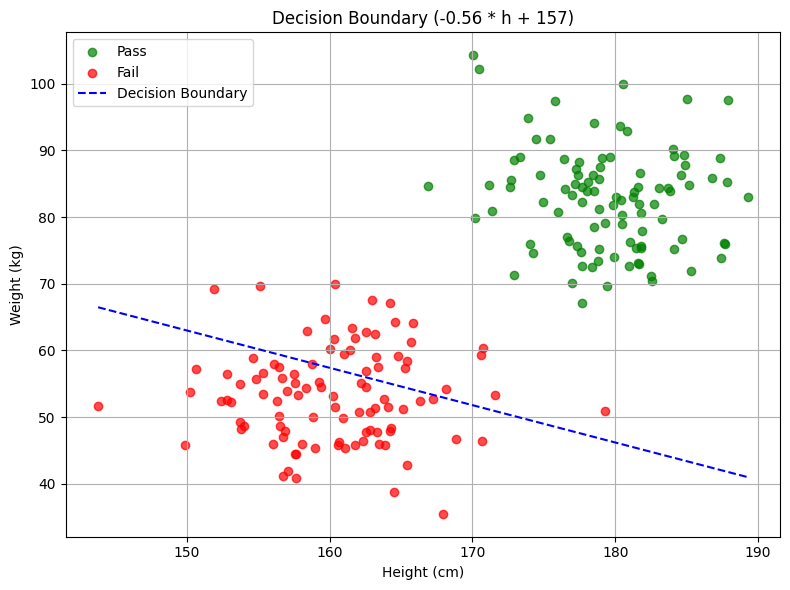

In [ ]:
# For this example, let's assume we already have heights, weights, labels from previous script
# Stack features into a matrix
X = np.column_stack((heights, weights))  # shape (N, 2)
y = labels  # shape (N,)

# Print model parameters
# print(f"Model weights: {w}")
# print(f"Model bias: {b}")

# Plot data
plt.figure(figsize=(8, 6))
plt.scatter(heights[y == 1], weights[y == 1], color='green', label='Pass', alpha=0.7)
plt.scatter(heights[y == 0], weights[y == 0], color='red', label='Fail', alpha=0.7)

# Plot decision boundary
x_vals = np.linspace(min(heights), max(heights), 100)
# Decision boundary: w1*x + w2*y + b = 0 -> y = -(w1*x + b)/w2
y_vals = -0.56 * x_vals + 147
plt.plot(x_vals, y_vals, 'b--', label='Decision Boundary')

# Labels and legend
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Decision Boundary (-0.56 * h + 157)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
%%manim -qm ExampleBadDecisionBoundary

from manim import *
import numpy as np

class ExampleBadDecisionBoundary(Scene):
    def construct(self):

        ## DO NOT CHANGE ANYTHING
        M = np.array([
            [0.56, 1.0],
            [0.0,  0.0]
        ])
        B = np.array([-157.0, 0.0])

        # Title
        title = Text("Matrix Transformation in the Same Plane", font_size=32).to_edge(UP)
        self.play(Write(title))

        # Create a single 2D plane
        axes = Axes(
            x_range=[-60, 200, 20],
            y_range=[-10, 100, 10],
            x_length=10,
            y_length=5.5,
            axis_config={"include_numbers": True},
        )
        labels = axes.get_axis_labels(x_label="Height / L(H, W)", y_label="Weight")
        # Lower the 'Weight' label slightly
        labels[1].shift(DOWN * 0.5)
        # The axes_group is now centered, preventing overlap with the title
        axes_group = VGroup(axes, labels)
        self.play(Create(axes_group))

        heights = np.concatenate([heights_pass, heights_fail])
        weights = np.concatenate([weights_pass, weights_fail])

        # Store input vectors and create dots
        input_vectors = [np.array([h, w]) for h, w in zip(heights, weights)]

        dots = []
        num_pass = len(heights_pass)
        for i, vec in enumerate(input_vectors):
            color = RED if i < num_pass else BLUE  # First `num_pass` are passing class
            dot = Dot(axes.coords_to_point(vec[0], vec[1]), color=color)
            dots.append(dot)
        dots_group = VGroup(*dots)


        # Show the initial dots on the 2D plane
        self.play(FadeIn(dots_group))
        self.wait(1)

        # Add a label for the current calculation, positioned under the axes
        calc_label = MathTex("Calculating: 0.56H + W", font_size=36).next_to(axes_group, DOWN, buff=0.3)
        self.play(Write(calc_label))
        self.wait(0.5)

        # --- First Animation Step: Apply the Linear Transformation ---
        linear_transform_animations = []
        intermediate_vectors = []
        for i, dot in enumerate(dots):
            input_vec = input_vectors[i]
            intermediate_vec = M @ input_vec
            intermediate_vectors.append(intermediate_vec)

            target_point = axes.coords_to_point(intermediate_vec[0], intermediate_vec[1])
            dot.generate_target()
            dot.target.move_to(target_point)
            linear_transform_animations.append(MoveToTarget(dot))

        # Animate all dots moving to their intermediate positions
        self.play(AnimationGroup(*linear_transform_animations, lag_ratio=0), run_time=2)
        self.wait(1)

        # --- Second Animation Step: Apply the Bias and Update Label ---
        final_calc_label = MathTex("Calculating: 0.56H + W - 157", font_size=36).move_to(calc_label)

        bias_addition_animations = []
        for i, dot in enumerate(dots):
            intermediate_vec = intermediate_vectors[i]
            output_vec = intermediate_vec + B

            # Calculate the target point on the CURRENT axes
            target_point = axes.coords_to_point(output_vec[0], output_vec[1])
            dot.generate_target()
            dot.target.move_to(target_point)
            bias_addition_animations.append(MoveToTarget(dot))

        # Animate the bias addition and label change together
        self.play(
            AnimationGroup(*bias_addition_animations, lag_ratio=0),
            Transform(calc_label, final_calc_label),
            run_time=2
        )
        self.wait(1)

        # --- Third Animation Step: Change Axes for a "Zoomed" View ---
        new_axes = Axes(
            x_range=[-50, 50, 10],
            y_range=[-0.5, 0.5, 0.5],
            x_length=10,
            y_length=3,
            axis_config={"include_numbers": True},
        )
        new_labels = new_axes.get_axis_labels(x_label="L(H, W)", y_label="")
        # Reverted the manual adjustment of the x-label's position
        new_axes_group = VGroup(new_axes, new_labels).move_to(axes_group)

        # Create animations to move dots to their correct positions on the new axes
        dot_zoom_animations = []
        for i, dot in enumerate(dots):
            output_vec = intermediate_vectors[i] + B
            target_point = new_axes.coords_to_point(output_vec[0], output_vec[1])
            dot.generate_target()
            dot.target.move_to(target_point)
            dot_zoom_animations.append(MoveToTarget(dot))

        # Animate the axis change and the final dot repositioning together
        self.play(
            Transform(axes_group, new_axes_group),
            AnimationGroup(*dot_zoom_animations, lag_ratio=0),
            run_time=2
        )
        self.wait(2)


Manim Community v0.19.0

[07/18/25 18:11:58] INFO     Animation 0 : Using cached data (hash :                           ]8;id=618076;file:///usr/local/lib/python3.11/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=339457;file:///usr/local/lib/python3.11/dist-packages/manim/renderer/cairo_renderer.py#89\89]8;;\
                             2016333726_3978016563_223132457)                                                      

[07/18/25 18:12:00] INFO     Animation 1 : Partial movie file written in                   ]8;id=86785;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=558316;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/Exa                         
                             mpleBadDecisionBoundary/543634251_227014468_4282679415.mp4'                           

[07/18/25 18:12:03] INFO     Animation 2 : Partial movie file written in                   ]8;id=168380;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=701050;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/Exa                         
                             mpleBadDecisionBoundary/543634251_2754580369_4052267886.mp4'                          

[07/18/25 18:12:05] INFO     Animation 3 : Partial movie file written in                   ]8;id=613215;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=413562;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/Exa                         
                             mpleBadDecisionBoundary/543634251_4217992463_582293891.mp4'                           

                    INFO     Writing Calculating: 0.56H + W to                              ]8;id=690456;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=152126;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py#111\111]8;;\
                             media/Tex/1184caa575686761.tex                                                        

[07/18/25 18:12:08] INFO     Animation 4 : Partial movie file written in                   ]8;id=255299;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=858448;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/Exa                         
                             mpleBadDecisionBoundary/543634251_3380345500_2148005812.mp4'                          

[07/18/25 18:12:09] INFO     Animation 5 : Partial movie file written in                   ]8;id=594021;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=97767;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/Exa                         
                             mpleBadDecisionBoundary/543634251_3394500337_3882560565.mp4'                          

[07/18/25 18:12:13] INFO     Animation 6 : Partial movie file written in                   ]8;id=276902;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=907347;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/Exa                         
                             mpleBadDecisionBoundary/543634251_411336016_1790111908.mp4'                           

[07/18/25 18:12:15] INFO     Animation 7 : Partial movie file written in                   ]8;id=87330;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=845139;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/Exa                         
                             mpleBadDecisionBoundary/543634251_4217992463_1762817198.mp4'                          

                    INFO     Writing Calculating: 0.56H + W - 157 to                        ]8;id=471641;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=73427;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py#111\111]8;;\
                             media/Tex/de1ad347628db165.tex                                                        

[07/18/25 18:12:21] INFO     Animation 8 : Partial movie file written in                   ]8;id=702809;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=911715;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/Exa                         
                             mpleBadDecisionBoundary/543634251_1438906505_2491513199.mp4'                          

[07/18/25 18:12:23] INFO     Animation 9 : Partial movie file written in                   ]8;id=721671;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=496365;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/Exa                         
                             mpleBadDecisionBoundary/543634251_4217992463_1141221536.mp4'                          

                    INFO     Writing . to media/Tex/ec2b01090b1fbb55.tex                    ]8;id=164300;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=104064;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py#111\111]8;;\

[07/18/25 18:12:24] INFO     Writing L(H, W) to media/Tex/5a581df55e1cdcbc.tex              ]8;id=432071;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=668432;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py#111\111]8;;\

[07/18/25 18:12:25] INFO     Writing \quad to media/Tex/d706ba1c11284492.tex                ]8;id=400724;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=727458;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py#111\111]8;;\

[07/18/25 18:12:38] INFO     Animation 10 : Partial movie file written in                  ]8;id=868998;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=641353;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/Exa                         
                             mpleBadDecisionBoundary/543634251_4198882271_751375739.mp4'                           

[07/18/25 18:12:43] INFO     Animation 11 : Partial movie file written in                  ]8;id=427087;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=707148;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/Exa                         
                             mpleBadDecisionBoundary/543634251_2844360058_2001226181.mp4'                          

                    INFO     Combining to Movie file.                                      ]8;id=208063;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=778494;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#739\739]8;;\

                    INFO                                                                   ]8;id=385895;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=149173;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#886\886]8;;\
                             File ready at                                                                         
                             '/content/media/videos/content/720p30/ExampleBadDecisionBound                         
                             ary.mp4'                                                                              
                                                                                                                   

                    INFO     Rendered ExampleBadDecisionBoundary                                       ]8;id=916367;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=938051;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene.py#255\255]8;;\
                             Played 12 animations                                                                  

## Activity 3


A bad decision boundary misclassification has blue points over 0 or red points less than 0. Can we use this to create a score to say how good or bad a decision boundary line is? For now, let's focus on low score meaning a good decision boundary line and high score meaning a bad line. We also want it to be finite as in -infinity should not be an achieveable score.

Your function should take the form f(s,y) where s is the score given by a chosen line for a data point and y is the correct class for that data point. You can represent classes in any way you want i.e. [-1 for fail and +1 for pass], [0 for fail and +1 for pass], or even [-99 for fail and 0 for pass] as long as the function can assign low number for good decision boundaries and high number for bad decision boundaries.

## Automating solution search

What you just came up with is an example of a loss (cost) function in machine learning world. They are used in every single supervised learning scenario in AI/ML. But we still have not automated a way to search for the decision boundary line

Gradient Descent is a great way to automate the search for the best decision boundary line without just trying random values. The core idea of gradient descent is to find what input minimizes the output of a function. It does so by finding gradient (derivative) which informs how to change the input such that output is minimized or maximized.

A big caveat for this is that the function we want to optimize (minimize/maximize) needs to be differentiable.

### Differentiable Function

A **differentiable function** is a function that has a **derivative** at each point in its domain. This means it is smooth — with no sharp corners, jumps, or discontinuities — and you can compute the rate of change at every point.

### Formal Definition

Let $f: \mathbb{R} \to \mathbb{R}$. We say that $f$ is **differentiable at a point** $x_0 \in \mathbb{R}$ if the following limit exists:

$$
f'(x_0) = \lim_{h \to 0} \frac{f(x_0 + h) - f(x_0)}{h}
$$

If this limit exists for **all** points in the domain, the function is said to be **differentiable** on that domain.

## Activity 4

Is your loss function differentiable? If not, can you make it differentiable by changing it a little bit?

## Descending

I came up with
$$(1-y_i)*max(0, L(h,w)) -y_i*min(0, L(h,w))$$
where $y_i \in \{0,+1\}$

I cheated a little by using max,min functions which are not strictly differentiable but for our purposes can be using because of mathematical idea called subgradients (see Wikipedia)

In [ ]:
lr = 0.01              # Increased learning rate
epsilon = 1e-8          # Slightly larger epsilon for stability
epochs = 1000

def loss_for_one(s, y):
    return (1 - y) * max(0, s) - y * min(0, s)

#min max norm
normed_X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

W = [np.random.randn() * 0.1, np.random.randn() * 0.1]
b = np.random.randn() * 0.1

def score(x, W, b):
    return W[0] * x[0] + W[1] * x[1] + b

def compute_loss(X, y, W, b):
    total_loss = 0.0
    for i in range(len(X)):
        s = score(X[i], W, b)
        total_loss += loss_for_one(s, y[i])
    return total_loss / len(X)

def finite_diff_grad(X, y, W, b, epsilon):
    grad_W = [0.0, 0.0]
    base_loss = compute_loss(X, y, W, b)

    for i in range(2):
        W_eps = W.copy()
        W_eps[i] += epsilon
        loss_eps = compute_loss(X, y, W_eps, b)
        grad_W[i] = (loss_eps - base_loss) / epsilon

    # One-sided difference for b
    loss_b_eps = compute_loss(X, y, W, b + epsilon)
    grad_b = (loss_b_eps - base_loss) / epsilon

    return grad_W, grad_b

# Training loop
for epoch in range(epochs):
    grad_W, grad_b = finite_diff_grad(normed_X, y, W, b, epsilon)

    W[0] -= lr * grad_W[0]
    W[1] -= lr * grad_W[1]
    b -= lr * grad_b

    if epoch % 100 == 0:
        loss = compute_loss(normed_X, y, W, b)
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")


Epoch 0: Loss = 0.0357
Epoch 100: Loss = 0.0002
Epoch 200: Loss = 0.0000
Epoch 300: Loss = 0.0000
Epoch 400: Loss = 0.0000
Epoch 500: Loss = 0.0000
Epoch 600: Loss = 0.0000
Epoch 700: Loss = 0.0000
Epoch 800: Loss = 0.0000
Epoch 900: Loss = 0.0000


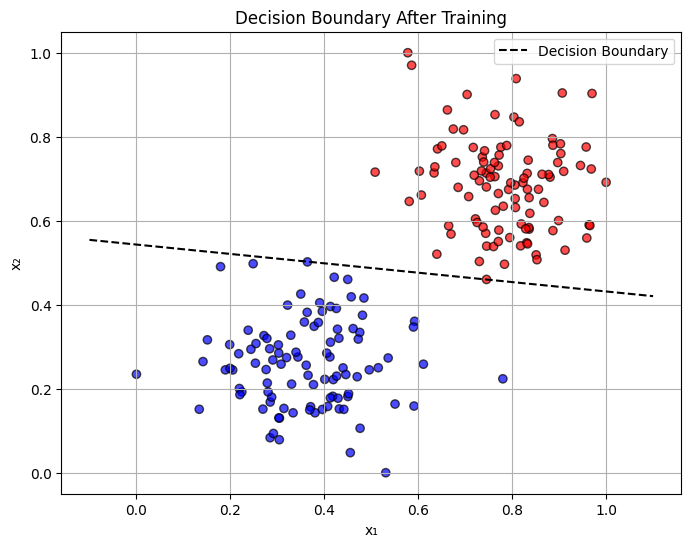

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(normed_X[:, 0], normed_X[:, 1], c=y, cmap='bwr', edgecolor='k', alpha=0.7)

# Plot decision boundary: W0 * x + W1 * y + b = 0 → y = -(W0 * x + b) / W1
x_vals = np.linspace(np.min(normed_X[:, 0]) - 0.1, np.max(normed_X[:, 0]) + 0.1, 100)
if W[1] != 0:
    y_vals = -(W[0] * x_vals + b) / W[1]
    plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
else:
    plt.axvline(-b / W[0], color='k', linestyle='--', label='Decision Boundary')

plt.xlabel("x₁")
plt.ylabel("x₂")
plt.title("Decision Boundary After Training")
plt.legend()
plt.grid(True)
plt.show()

## Activity 5

Try your own loss function

In [ ]:
# CHANGE THESE HYPERPARAMETER IF YOU NEED TO
lr = 0.01
epsilon = 1e-8
epochs = 2500

# IMPLEMENT THIS FUNCTION ONLY
def loss_for_one(s, y):
    pass

#min max norm
normed_X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

W = [np.random.randn() * 0.1, np.random.randn() * 0.1]
b = np.random.randn() * 0.1

def score(x, W, b):
    return W[0] * x[0] + W[1] * x[1] + b

def compute_loss(X, y, W, b):
    total_loss = 0.0
    for i in range(len(X)):
        s = score(X[i], W, b)
        total_loss += loss_for_one(s, y[i])
    return total_loss / len(X)

def finite_diff_grad(X, y, W, b, epsilon):
    grad_W = [0.0, 0.0]
    base_loss = compute_loss(X, y, W, b)

    for i in range(2):
        W_eps = W.copy()
        W_eps[i] += epsilon
        loss_eps = compute_loss(X, y, W_eps, b)
        grad_W[i] = (loss_eps - base_loss) / epsilon

    # One-sided difference for b
    loss_b_eps = compute_loss(X, y, W, b + epsilon)
    grad_b = (loss_b_eps - base_loss) / epsilon

    return grad_W, grad_b

# Training loop
for epoch in range(epochs):
    grad_W, grad_b = finite_diff_grad(normed_X, y, W, b, epsilon)

    W[0] -= lr * grad_W[0]
    W[1] -= lr * grad_W[1]
    b -= lr * grad_b

    if epoch % 100 == 0:
        loss = compute_loss(normed_X, y, W, b)
        print(f"Epoch {epoch}: Loss = {loss:.4f}")


TypeError: unsupported operand type(s) for +=: 'float' and 'NoneType'

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(normed_X[:, 0], normed_X[:, 1], c=y, cmap='bwr', edgecolor='k', alpha=0.7)

# Plot decision boundary: W0 * x + W1 * y + b = 0 → y = -(W0 * x + b) / W1
x_vals = np.linspace(np.min(normed_X[:, 0]) - 0.1, np.max(normed_X[:, 0]) + 0.1, 100)
if W[1] != 0:
    y_vals = -(W[0] * x_vals + b) / W[1]
    plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
else:
    plt.axvline(-b / W[0], color='k', linestyle='--', label='Decision Boundary')

plt.xlabel("x₁")
plt.ylabel("x₂")
plt.title("Decision Boundary After Training")
plt.legend()
plt.grid(True)
plt.show()

## Congratulations!

So far what we just created is the most basic form of a neural network where there are 2 nodes in input and 1 node in output. What is happening here is exactly what would happen in the final layer of an LLM.

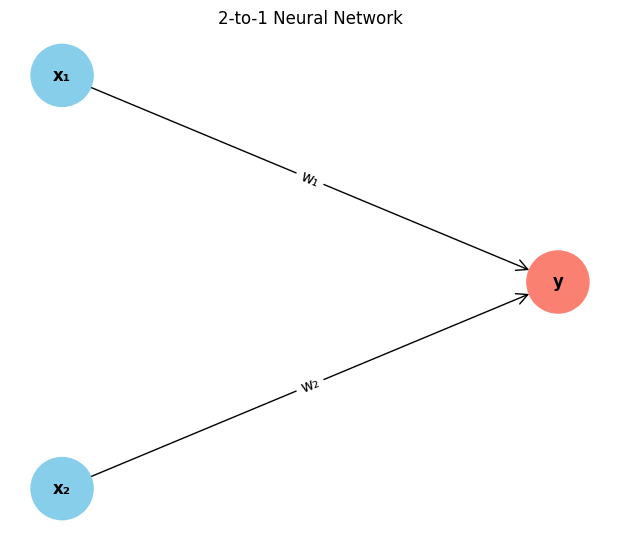

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes with layer positions
G.add_node("x₁", pos=(0, 1))
G.add_node("x₂", pos=(0, 0))
G.add_node("y",  pos=(1, 0.5))

# Add edges (with symbolic weight labels)
G.add_edge("x₁", "y", label="w₁")
G.add_edge("x₂", "y", label="w₂")

# Get positions
pos = nx.get_node_attributes(G, 'pos')
edge_labels = nx.get_edge_attributes(G, 'label')

# Draw the network
plt.figure(figsize=(6, 5))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color=['skyblue', 'skyblue', 'salmon'],
        font_size=12, font_weight='bold', arrows=True, arrowstyle='->', arrowsize=20)

# Draw edge labels (weights)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=11)

plt.title("2-to-1 Neural Network")
plt.axis('off')
plt.show()


We are still missing a key part of a neural network. The next example will make that clear.

## Let's try another dataset

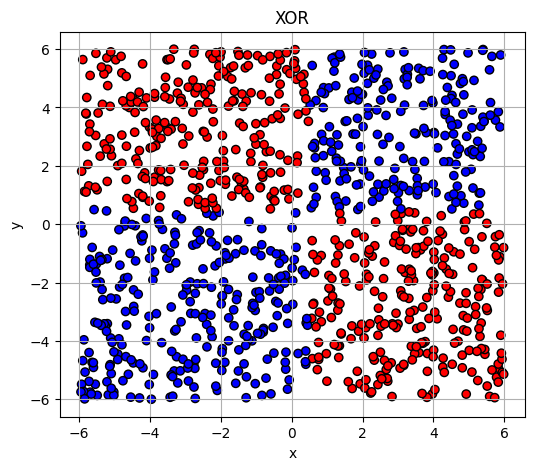

In [ ]:
# Define the continuous XOR function
def xor_continuous(x, y):
    return x + y - 2 * x * y

# Generate data
n_samples = 1000
X = np.random.rand(n_samples, 2) * 12 - 6

x_vals, y_vals = X[:, 0], X[:, 1]
y_cont = xor_continuous(x_vals, y_vals)

# Define binary class from continuous XOR
class_labels = (y_cont > 0.5).astype(int)

# Visualize the class labels
plt.figure(figsize=(6, 5))
scatter = plt.scatter(x_vals, y_vals, c=class_labels, cmap='bwr', edgecolor='k')
plt.xlabel("x")
plt.ylabel("y")
plt.title("XOR")
plt.grid(True)
plt.show()


## Activity 6

Try different affine transforms to see if you can make the data separable with a straight line.

In [ ]:
%%manim -qm XORPointsTransfrom

from manim import *
import numpy as np

class XORPointsTransfrom(Scene):
    def construct(self):
        ## Play around with this matrix and bias
        M = np.array([[ 3.6728,  3.5775],
                      [-0.0161,  0.2539]])
        B = np.array([-4.6491, -0.2522])

        # Title
        title = Text("Matrix Transformation in the Same Plane", font_size=32).to_edge(UP)
        self.play(Write(title))

        # Axes
        axes = Axes(
            x_range=[-20, 20, 5],
            y_range=[-7, 7, 2],
            x_length=6,
            y_length=6,
            axis_config={"include_numbers": True},
        )
        labels = axes.get_axis_labels(x_label="x", y_label="y")
        labels[1].shift(DOWN * 0.5)
        axes_group = VGroup(axes, labels)
        self.play(Create(axes_group))

        # ---- Generate XOR-continuous data ----
        n_samples = 100
        X = np.random.rand(n_samples, 2)
        x_vals, y_vals = X[:, 0], X[:, 1]

        # Continuous XOR function
        def xor_continuous(x, y):
            return x + y - 2 * x * y

        y_cont = xor_continuous(x_vals, y_vals)
        class_labels = (y_cont > 0.5).astype(int)

        # Store vectors and create dots
        input_vectors = [np.array([x, y]) for x, y in zip(x_vals, y_vals)]

        dots = []
        for vec, label in zip(input_vectors, class_labels):
            color = RED if label == 1 else BLUE
            dot = Dot(axes.coords_to_point(vec[0], vec[1]), color=color)
            dots.append(dot)
        dots_group = VGroup(*dots)

        self.play(FadeIn(dots_group))
        self.wait(1)

        # ---- Apply affine transform ----
        target_dots_group = dots_group.copy()
        for dot, vec in zip(target_dots_group, input_vectors):
            output_vec = M @ vec + B
            new_point = axes.coords_to_point(output_vec[0], output_vec[1])
            dot.move_to(new_point)

        self.play(Transform(dots_group, target_dots_group))
        self.wait(2)


Manim Community v0.19.0

[07/18/25 18:27:37] INFO     Animation 0 : Using cached data (hash :                           ]8;id=287329;file:///usr/local/lib/python3.11/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=417719;file:///usr/local/lib/python3.11/dist-packages/manim/renderer/cairo_renderer.py#89\89]8;;\
                             2016333726_3978016563_223132457)                                                      

[07/18/25 18:27:39] INFO     Animation 1 : Partial movie file written in                   ]8;id=247740;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=616792;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/XOR                         
                             PointsTransfrom/543634251_932196653_4282679415.mp4'                                   

[07/18/25 18:27:42] INFO     Animation 2 : Partial movie file written in                   ]8;id=619767;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=538798;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/XOR                         
                             PointsTransfrom/543634251_756744299_223306466.mp4'                                    

[07/18/25 18:27:44] INFO     Animation 3 : Partial movie file written in                   ]8;id=252382;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=615829;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/XOR                         
                             PointsTransfrom/543634251_4217992463_307362868.mp4'                                   

[07/18/25 18:27:46] INFO     Animation 4 : Partial movie file written in                   ]8;id=912477;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=966932;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/XOR                         
                             PointsTransfrom/543634251_1913691282_2231701229.mp4'                                  

[07/18/25 18:27:48] INFO     Animation 5 : Partial movie file written in                   ]8;id=60096;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=239793;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/XOR                         
                             PointsTransfrom/543634251_2844360058_1088234723.mp4'                                  

                    INFO     Combining to Movie file.                                      ]8;id=882064;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=899674;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#739\739]8;;\

                    INFO                                                                   ]8;id=844659;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=392527;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#886\886]8;;\
                             File ready at                                                                         
                             '/content/media/videos/content/720p30/XORPointsTransfrom.mp4'                         
                                                                                                                   

                    INFO     Rendered XORPointsTransfrom                                               ]8;id=409162;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=206775;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene.py#255\255]8;;\
                             Played 6 animations                                                                   

## Beyond Affine Transforms

Previous activity is actually impossible. Without going into rigorous proof, the argument essentially boils down to the fact that composition of affine transformation is still affine, ie preserves parallel lines. What we want is non linear transformations, ones that dont preserve parallel lines. If this function is still differentiable then the gradient search algorithm can still be applied.

One simplest form of this type of non-linearity is actually a piece-wise linear function called ReLU (rectified linear unit) defined by $ReLU(x) = max(0,x)$

- **Scalar input**:
  $$
  \text{ReLU}(x) = \max(0, x)
  $$

- **2D vector input**:
  $$
  \text{ReLU}(\mathbf{x}) = \begin{bmatrix}
  \max(0, x_1) \\
  \max(0, x_2)
  \end{bmatrix}
  \quad \text{for } \mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}
  $$

- **$n$-dimensional vector input**:
  $$
  \text{ReLU}(\mathbf{x}) = \begin{bmatrix}
  \max(0, x_1) \\
  \max(0, x_2) \\
  \vdots \\
  \max(0, x_n)
  \end{bmatrix}
  \quad \text{for } \mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix}
  $$

In other words, ReLU is applied element-wise to any input vector.


Lets visualize what it does to a plane. Remember what affine transform looked like? Do you see how it is not affine?

In [ ]:
%%manim -qm ReLUPlane

from manim import *
import numpy as np

class ReLUPlane(Scene):
    def construct(self):
        # 1. Create a static plane for the AXES ONLY
        # We make its background lines invisible.
        axes = NumberPlane(
            x_range=[-10, 10, 1],
            y_range=[-10, 10, 1],
            x_length=15,
            y_length=15,
            axis_config={
                "stroke_color": WHITE, # Make axes stand out
                "stroke_width": 3,
                "include_tip": True,
                "numbers_to_exclude": [0]
            },
            background_line_style={"stroke_opacity": 0} # Hide the grid lines
        ).add_coordinates()

        # 2. Create a second plane for the GRID ONLY
        # We make its axes invisible.
        grid = NumberPlane(
            x_range=[-10, 10, 1],
            y_range=[-10, 10, 1],
            x_length=15,
            y_length=15,
            axis_config={"stroke_opacity": 0}, # Hide the axes
            background_line_style={
                "stroke_color": TEAL,
                "stroke_width": 2,
                "stroke_opacity": 0.5
            }
        )

        # Create vectors in all four quadrants to clearly show the ReLU effect.
        vectors = VGroup()
        vector_coords = [
            (3, 4), (-5, 2), (-4, -3), (5, -2),
            (6, 1), (-1, 5), (-2, -5), (3, -5)
        ]
        for x, y in vector_coords:
            vec = Vector(grid.c2p(x, y), color=random_color(), stroke_width=5)
            vectors.add(vec)

        # Add a title label
        title = Tex("ReLU Activation: ", r"$f(\mathbf{v}) = [\max(0, x), \max(0, y)]$", font_size=48).to_edge(UP)

        # Add the static axes and the dynamic grid/vectors
        self.add(axes, grid, vectors, title)
        self.wait(1)

        # Define the ReLU transformation function for a point.
        def apply_relu_transform(point):
            # For a point (x, y, z), apply ReLU to the x and y coordinates.
            x, y, z = point
            new_x = max(0, x)
            new_y = max(0, y)
            return np.array([new_x, new_y, z])

        # Animate ONLY the grid and vectors using the ReLU function.
        self.play(
            grid.animate.apply_function(apply_relu_transform),
            vectors.animate.apply_function(apply_relu_transform),
            run_time=3
        )
        self.wait(2)


Manim Community v0.19.0

[07/18/25 18:18:44] INFO     Writing ReLU Activation: $f(\mathbf{v}) = [\max(0, x), \max(0, ]8;id=21391;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=93565;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py#111\111]8;;\
                             y)]$ to media/Tex/301c4b8186f5cada.tex                                                

                    INFO     Writing ReLU Activation: to media/Tex/a44352553bb5a3bb.tex     ]8;id=967407;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=710734;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py#111\111]8;;\

[07/18/25 18:18:45] INFO     Writing $f(\mathbf{v}) = [\max(0, x), \max(0, y)]$ to          ]8;id=676957;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=340958;file:///usr/local/lib/python3.11/dist-packages/manim/utils/tex_file_writing.py#111\111]8;;\
                             media/Tex/1b71994d5dffbe4f.tex                                                        

[07/18/25 18:18:47] INFO     Animation 0 : Partial movie file written in                   ]8;id=809261;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=261280;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/ReL                         
                             UPlane/2016333726_1432596116_2989173200.mp4'                                          

[07/18/25 18:18:53] INFO     Animation 1 : Partial movie file written in                   ]8;id=407826;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=166678;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/ReL                         
                             UPlane/543634251_603634115_928766601.mp4'                                             

[07/18/25 18:18:57] INFO     Animation 2 : Partial movie file written in                   ]8;id=195058;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=334709;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/ReL                         
                             UPlane/543634251_2844360058_2144904047.mp4'                                           

                    INFO     Combining to Movie file.                                      ]8;id=370045;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=408012;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#739\739]8;;\

                    INFO                                                                   ]8;id=811251;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=160938;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#886\886]8;;\
                             File ready at                                                                         
                             '/content/media/videos/content/720p30/ReLUPlane.mp4'                                  
                                                                                                                   

                    INFO     Rendered ReLUPlane                                                        ]8;id=432485;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=600696;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene.py#255\255]8;;\
                             Played 3 animations                                                                   

Here we train a 2->3(ReLU)->1 neural network. This network first learns to project the original input into a 3D space which when trained is able to make the data linearly separable with a plane.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate dataset
def xor_continuous(x, y):
    return x + y - 2 * x * y

n_samples = 1000

np.random.seed(4412341)

# Scale inputs from [0, 1] to [-6, +6]
X_np = np.random.rand(n_samples, 2) * 12 - 6

# Compute labels using the XOR-like function
y_np = xor_continuous(X_np[:, 0], X_np[:, 1])
y_np = (y_np > 0.5).astype(np.float32)  # binary class


X = torch.tensor(X_np, dtype=torch.float32)
y = torch.tensor(y_np, dtype=torch.float32).view(-1, 1)

torch.manual_seed(42)

# Step 2: Define MLP
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 3)
        self.fc2 = nn.Linear(3, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

model = MLP()

# Step 3: Train
criterion = nn.BCELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.01, weight_decay=0.005)

for epoch in range(10000):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    predictions = (outputs > 0.5).float()
    correct = (predictions == y).float().sum()
    accuracy = correct / y.shape[0]
    if epoch % 1000 == 0:
        print(f"Epoch {epoch} | Loss: {loss.item():.4f} | Accuracy: {accuracy.item()*100:.2f}%")

    loss.backward()
    optimizer.step()
print("Layer 1 weights:\n", model.fc1.weight.data)
print("Layer 1 bias:\n", model.fc1.bias.data)

Epoch 0 | Loss: 0.6642 | Accuracy: 54.60%
Epoch 1000 | Loss: 0.0450 | Accuracy: 98.60%
Epoch 2000 | Loss: 0.0239 | Accuracy: 99.10%
Epoch 3000 | Loss: 0.0146 | Accuracy: 99.60%
Epoch 4000 | Loss: 0.0087 | Accuracy: 99.80%
Epoch 5000 | Loss: 0.0050 | Accuracy: 99.90%
Epoch 6000 | Loss: 0.0030 | Accuracy: 100.00%
Epoch 7000 | Loss: 0.0020 | Accuracy: 100.00%
Epoch 8000 | Loss: 0.0014 | Accuracy: 100.00%
Epoch 9000 | Loss: 0.0010 | Accuracy: 100.00%
Layer 1 weights:
 tensor([[  0.0855,  13.3558],
        [-15.2368,  12.8103],
        [-15.4458,  -0.0410]])
Layer 1 bias:
 tensor([-6.2895,  1.9125,  8.1148])


Let's visualize what the hidden layer has learned. If the loss is 0, the model should have learned a transformation which after ReLU is applied should make the data linearly separable.

In [ ]:
%%manim -qm XORLayer1Transform3D

from manim import *
import numpy as np

class XORLayer1Transform3D(ThreeDScene):
    def construct(self):
        # === Trained Layer 1 weights and biases ===
        # These represent the learned parameters of the first layer of a neural network.
        W = model.fc1.weight.data.numpy()
        b = model.fc1.bias.data.numpy()

        # === Scene Setup ===
        # Set up the 3D axes. The ranges are chosen to encompass the data points
        # both before and after the transformations.
        axes = ThreeDAxes(
            x_range=[-55, 65, 20],
            y_range=[-70, 75, 20],
            z_range=[-95, 110, 20], # Adjusted z-range to show negative affine outputs
            x_length=7,
            y_length=7,
            z_length=6,
        )
        # Set the initial camera angle for a good perspective.
        self.set_camera_orientation(phi=70 * DEGREES, theta=30 * DEGREES)
        self.play(Create(axes))

        # === Data Generation ===
        # Generate XOR-like data points in a 2D plane.
        n_samples = 50
        # Input data spans from -6 to 6 on x and y axes.
        X_data = np.random.rand(n_samples, 2) * 12 - 6
        # A continuous version of the XOR function to determine color.
        y_cont = X_data[:, 0] * X_data[:, 1]
        labels = (y_cont > 0).astype(int)

        # === Point Creation and Transformation Calculation ===
        # Create lists to hold the Manim dot objects and their target positions.
        input_dots = []
        affine_targets = []
        relu_targets = []

        for i in range(n_samples):
            x, y = X_data[i]
            # Color the dots based on their XOR classification.
            color = RED if labels[i] == 1 else BLUE

            # 1. Create the initial input dot on the z=0 plane.
            input_vec = np.array([x, y, 0])
            dot = Dot3D(axes.c2p(*input_vec), radius=0.05, color=color)
            input_dots.append(dot)

            # 2. Calculate the affine transformation (W*x + b).
            affine_out = W @ np.array([x, y]) + b
            affine_targets.append(axes.c2p(*affine_out))

            # 3. Calculate the ReLU activation (max(0, affine_out)).
            relu_out = np.maximum(0, affine_out)
            relu_targets.append(axes.c2p(*relu_out))

        # === Animation Sequence ===

        # Show all input points on the z=0 plane.
        self.play(FadeIn(VGroup(*input_dots)))
        self.wait(1)

        # --- Animation Step 1: Affine Transformation ---
        # Animate each dot moving to its position after the affine transformation.
        self.play(
            *[dot.animate.move_to(target) for dot, target in zip(input_dots, affine_targets)],
            run_time=2
        )
        self.wait(1.5)

        # --- Animation Step 2: ReLU Activation ---
        # Animate each dot moving to its final position after the ReLU activation.
        # Points with negative coordinates will "snap" to the zero planes.
        self.play(
            *[dot.animate.move_to(target) for dot, target in zip(input_dots, relu_targets)],
            run_time=2
        )
        self.wait(2)

        # --- Final Rotation ---
        # Begin a continuous rotation of the camera around the Z-axis (theta)
        # to showcase the final 3D arrangement of the points.
        self.begin_ambient_camera_rotation(rate=0.35, about="theta")
        self.wait(8) # Let it rotate for a few seconds
        self.stop_ambient_camera_rotation()


Manim Community v0.19.0

[07/18/25 19:11:01] INFO     Animation 0 : Partial movie file written in                   ]8;id=199622;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=65874;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/XOR                         
                             Layer1Transform3D/3037135221_2391667183_223132457.mp4'                                

[07/18/25 19:12:07] INFO     Animation 1 : Partial movie file written in                   ]8;id=246193;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=137312;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/XOR                         
                             Layer1Transform3D/1267220081_740533139_3312879842.mp4'                                

[07/18/25 19:12:14] INFO     Animation 2 : Partial movie file written in                   ]8;id=935425;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=386427;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/XOR                         
                             Layer1Transform3D/1267220081_2631580503_643942901.mp4'                                

[07/18/25 19:14:18] INFO     Animation 3 : Partial movie file written in                   ]8;id=450388;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=700938;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/XOR                         
                             Layer1Transform3D/1267220081_511597655_2853092040.mp4'                                

[07/18/25 19:14:28] INFO     Animation 4 : Partial movie file written in                   ]8;id=318896;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=317016;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/XOR                         
                             Layer1Transform3D/1267220081_3218342468_2891418120.mp4'                               

[07/18/25 19:16:35] INFO     Animation 5 : Partial movie file written in                   ]8;id=343941;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=372181;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/XOR                         
                             Layer1Transform3D/1267220081_2730327450_4294743047.mp4'                               

[07/18/25 19:16:45] INFO     Animation 6 : Partial movie file written in                   ]8;id=634760;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=661655;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/XOR                         
                             Layer1Transform3D/1267220081_789064381_1757110609.mp4'                                

[07/18/25 19:24:39] INFO     Animation 7 : Partial movie file written in                   ]8;id=82801;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=921898;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/content/720p30/partial_movie_files/XOR                         
                             Layer1Transform3D/2725596586_4130465104_1862404589.mp4'                               

                    INFO     Combining to Movie file.                                      ]8;id=732940;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=725937;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#739\739]8;;\

                    INFO                                                                   ]8;id=714543;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=660273;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#886\886]8;;\
                             File ready at                                                                         
                             '/content/media/videos/content/720p30/XORLayer1Transform3D.mp                         
                             4'                                                                                    
                                                                                                                   

                    INFO     Rendered XORLayer1Transform3D                                             ]8;id=126704;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=427825;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene.py#255\255]8;;\
                             Played 8 animations                                                                   